# Prosjektoppgave Py1010

In [52]:
# importerer pandas som pd. Bruk versjon 1.1.5
import pandas as pd 
# importerer numpy som np. Bruk versjon 1.19.5 
import numpy as np
#importerer matplotlib modulen pyplot som plt. Bruk versjon 3.3.4
import matplotlib
import matplotlib.pyplot as plt
#importerer regex bibliotek re
import re

print("Din pandas versjon: : ",pd.__version__,"\nDin numpy versjon: ",   np.__version__,"\nDin matplotlib versjon: ", matplotlib.__version__)

Din pandas versjon: :  1.1.5 
Din numpy versjon:  1.19.5 
Din matplotlib versjon:  3.3.4


# Del a

Skriv et program som leser inn filen ‘support_uke_24.xlsx’ og lagrer data fra kolonne 1 
i en array med variablenavn ‘u_dag’, dataen i kolonne 2 lagres i arrayen ‘kl_slett’, data i 
kolonne 3 lagres i arrayen ‘varighet’ og dataen i kolonne 4 lagres i arrayen ‘score’.

In [54]:
#leser data fra support_uke_24.xlsx og skriver dette til en pandas dataframe
filsti=r'support_uke_24.xlsx'
df = pd.read_excel(filsti, sheet_name="Ark1")
#konverterer data type på Klokkeslett og Varighet til datetime
df ['Varighet'] = pd.to_datetime(df ['Varighet'], format='%H:%M:%S' )
df ['Klokkeslett'] = pd.to_datetime(df ['Klokkeslett'], format='%H:%M:%S' )

#henter kolloner i dataframet som en pandas series bruker metoden .tonumpy() for å konvertere til et numpy array krever versjon 1.1.5 av pandas
u_dag = df["Ukedag"].to_numpy()
kl_slett = df["Klokkeslett"].to_numpy()
varighet = df["Varighet"].to_numpy()
score = df["Tilfredshet"].to_numpy()

#funksjon som returnerer variabel navnet til objektet
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]


for i in (u_dag,kl_slett,varighet,score):
    print("variabelnavn: \n",namestr(i, globals())[0], "\n er av type:\n" , type(i))

variabelnavn: 
 u_dag 
 er av type:
 <class 'numpy.ndarray'>
variabelnavn: 
 kl_slett 
 er av type:
 <class 'numpy.ndarray'>
variabelnavn: 
 varighet 
 er av type:
 <class 'numpy.ndarray'>
variabelnavn: 
 score 
 er av type:
 <class 'numpy.ndarray'>


# Del b
Skriv et program som finner antall henvendelser for hver de 5 ukedagene. Resultatet 
visualiseres ved bruk av et histogram (‘søylediagram’).

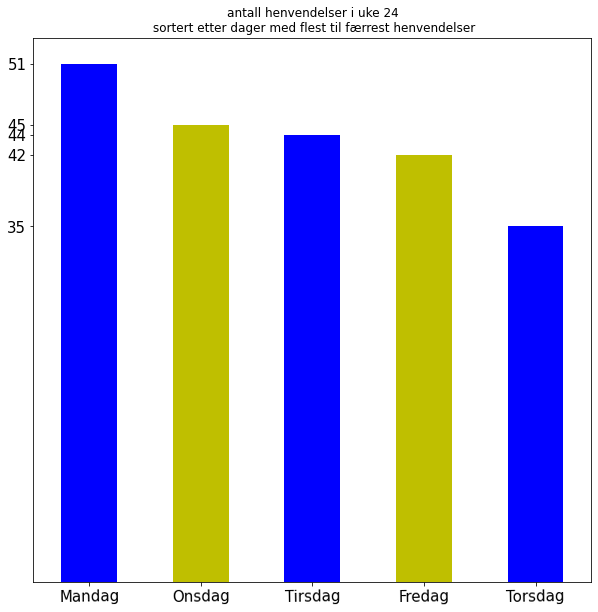

In [55]:

#pandas metode som teller og bruker matplotlib for å plotte antall pr dag i dataframe kolonnen Ukedag"
df["Ukedag"].value_counts().plot(
                                 kind="bar", #Type plot 
                                 title=("antall henvendelser i uke "+filsti[-7:-5]+"\n sortert etter dager med flest til færrest henvendelser"), #Titlefelt 
                                 yticks=df["Ukedag"].value_counts(), #verdi label på y akse
                                 rot=1, #rotasjon på tekst langs x akse 1=horisontal                                 
                                 figsize=(10,10), #figurstørrelse
                                 fontsize=15, #font størrels
                                 color=("b","y"), #farge
                                 grid=False #rutenett
                                )
 
# viser plottet
plt.show()



# Del C
Skriv et program som finner minste og lengste samtaletid som er loggført for uke 24. 
Svaret skrives til skjerm med informativ tekst.

In [56]:

#funksjon som printer ut array med [timer, minutter, sekunder] som informativ tekst 
def lesertid(liste, key):
    #liste med enheter
    enhet=["timer","minutter", "sekunder"]
    #tekst treng som starter settningen
    text=[f"Den {key} samtaletiden var"]
    
    #for løkke som jobber gjennom liste med timer,minutter og siekunder
    for i,j in enumerate(liste):
        #skriver ut timer eller minutter med og etter om de er større en 0  
        if i==0 or i==1:
            if j!=0:
                text.append(f"{liste[i]} {enhet[i]} og")
            else:
                pass
        #skriver ut sekunder
        elif i==2:
            text.append(f"{liste[i]} {enhet[i]}")
        else:
            
            pass
    #setter sammen liste med strenger fra for løkka til en streng og skriver denne    
    print(" ".join(text))
            
    
           

korteste=str(varighet.min())
#finer min og max tid og deler dato streng i dato, timer, minuter og sekunder
korteste=re.split(" ""|:",str(df["Varighet"].min()))
lengste=re.split(" ""|:",str(df["Varighet"].max()))

#fjerne dato
lengste=np.array(lengste[1:])
korteste=np.array(korteste[1:])


#konverter til int for å få riktig format
lengste=lengste.astype(float)
lengste=lengste.astype(int)
korteste=korteste.astype(float)
korteste=korteste.astype(int)

lesertid(korteste, "korteste")
lesertid(lengste, "lengste")


Den korteste samtaletiden var 59 sekunder
Den lengste samtaletiden var 11 minutter og 28 sekunder


# Del d) KREVENDE:
Skriv et program som regner ut gjennomsnittlig samtaletid basert på alle 
henvendelser i uke 24. 

In [57]:
#importere datetime modulen
import datetime as dt
#funksjon som runder tid av til nærmeste sekund
def round_seconds(obj: dt.datetime):
    #om microsekund er lik eller større en 500 legges det til 1 sekund til datetime objektet
    if obj.microsecond >= 500000:
        obj += dt.timedelta(seconds=1)
    #retunerer date objektet med microsekund satt til 0    
    return obj.replace(microsecond=0)

#runder av til nærmeste hele sekund
gjennomsnitt=round_seconds(df["Varighet"].mean())
#finner og deler den dato streng i dato, timer, minutter og sekunder 
gjennomsnitt=re.split(" ""|:",str(gjennomsnitt))
#dropper dato
gjennomsnitt=np.array(gjennomsnitt[1:])
#bytter til riktige formater for lesertid funksjonen
gjennomsnitt=gjennomsnitt.astype(float)
gjennomsnitt=gjennomsnitt.astype(int)

lesertid(gjennomsnitt, "gjennomsnittlige")

Den gjennomsnittlige samtaletiden var 6 minutter og 40 sekunder


# Del e) 
Supportvaktene i MORSE er delt inn i 2-timers bolker: kl 08-10, kl 10-12, kl 12-14 og kl 
14-16. Skriv et program som finner det totale antall henvendelser supportavdelingen mottok
for hver av tidsrommene 08-10, 10-12, 12-14 og 14-16 for uke 24. Resultatet visualiseres ved 
bruk av et sektordiagram (kakediagram)

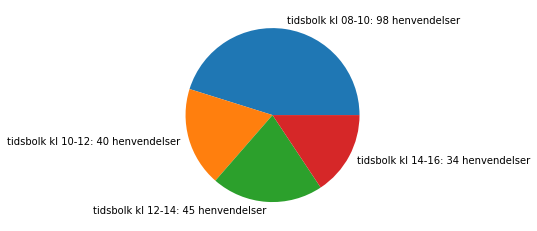

In [58]:
#funksjon som henter og summer antall henvendelser i ett gitt tidsrommet som gis fra og til i input
#oppgave har overlappende tidsrom så jeg har tatt utgangspunkt i fra om med 0800 til kl 1000 osv 
def bolk(fra, til):

    bolk=df[(df['Klokkeslett'] >= f'1900-01-01 {fra}:00:00') & (df['Klokkeslett'] < f'1900-01-01 {til}:00:00')]
    return bolk["Ukedag"].value_counts().sum()


#array med tidsrom
tidsrom=np.array([("08","10"),("10","12"),("12","14"),("14","16")])
# tomme array for antall i ett tidrom og label til plot
bolker=np.array([])
bolkerlbl=np.array([])

#for løkke som fyller bolker og bolkerlbl med data generert av bolk funksjonen fra tidsrommene gitt i array tidrom
for i,j in enumerate(tidsrom):
    
    bolker = np.append(bolker, bolk(j[0],j[1]))
    bolkerlbl = np.append(bolkerlbl,f"tidsbolk kl {j[0]}-{j[1]}: {int(bolker[-1])} henvendelser")

#plotter bolker og bolkerlbl
plt.pie(bolker, labels=bolkerlbl)
plt.show()

# Del f)

Kundens tilfredshet loggføres som tall fra 1-10 hvor 1 indikerer svært misfornøyd og 
10 indikerer svært fornøyd. Disse tilbakemeldingene skal så overføres til NPS-systemet (Net 
Promoter Score).

Lag et program som regner ut supportavdelings NPS og skriver svaret til skjerm. Merk: 
Kunder som ikke har gitt tilbakemelding på tilfredshet, skal utelates fra utregningene. 

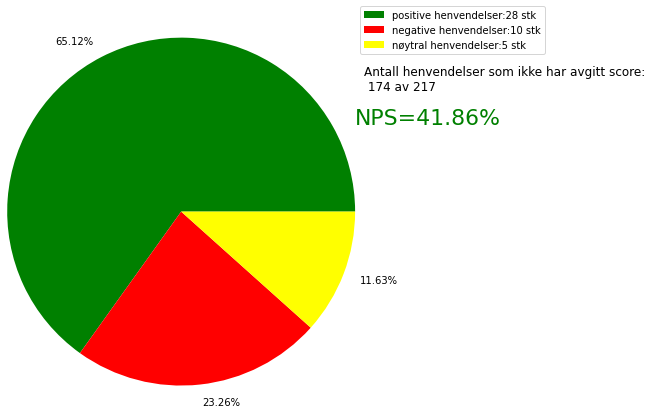

In [60]:
# funksjon som dropper kunder i lista som ikke har gitt en score og lager en dataframe til poeng
poeng=df["Tilfredshet"].dropna()
# oppretter arrays for negative, positive og nøytrale hendvendelser
negative=np.array([])
neutral=np.array([])
positive=np.array([])
err=False 

#for løkke som legger til besvarelsene baserert på størrelse
for i in poeng:
    # legger til verdier fom. 1 tom. 6 i negative array
    if i<=6 and i>=1:
        negative=np.append(negative,i)
        #legger til verdier på 9 og 10 til positive
    elif i>=9 and i<=10:
        positive=np.append(positive,i)
        #legger verdier på 7 og 8 til nøytral array
    elif i>=7 and i<=8:
        neutral=np.append(neutral,i)
    #om det er verdier igjen utenfor NPS skalaen i listen settes en error bool til sann
    else:
        err=True


#regner ut prosent verdi for de forskjellige gruppene        
pos=positive.size/poeng.count()*100
neg=negative.size/poeng.count()*100
neu=neutral.size/poeng.count()*100


#if satatment som skirver plott til skjerm gitt at liste ikke inneholder ugyldige verdier
if err == False:
    #array til plot
    pieprosent=np.array([pos,neg,neu])
    #array med farger til plot
    piefarger=np.array(["green","red", "yellow" ])
    #array med labels til plot
    pielabel=np.array([f"{pos:.2f}%" , f"{neg:.2f}%" ,f"{neu:.2f}%"])
    #plotter et kakediagram med array som definert over
    plt.pie(pieprosent, labels=pielabel, colors=piefarger, radius=2)
    #plotter NPS score til skjermen
    plt.annotate(f"NPS={pos-neg:.2f}%", (2,1), fontsize=22,annotation_clip=False, color="green")
    plt.annotate(f'Antall henvendelser som ikke har avgitt score:\n {df["Tilfredshet"].isna().sum()} av {df["Ukedag"].count()}', (2.1,1.4), fontsize=12,annotation_clip=False, color="black")
    #plotter legend til skjerm med antall hendveldelser i hvert kakestykke
    plt.legend([f"positive henvendelser:{positive.size} stk",f"negative henvendelser:{negative.size} stk",f"nøytral henvendelser:{neutral.size} stk"],
              loc=3, bbox_to_anchor=(1.3, 1.2, 0, 0))
    plt.show()
#skriver til skjerm om det er ugyldige verdier i inputliste.    
else: 
    print("det er ugyldige verdier i input listene")
